# Show the correlations using the location informations and the prices.

In [2]:
import pandas as pd

try:
    NewYork_location = pd.read_csv('/workspaces/Coworking/src/results/New York/LocationCoworking.csv')
    print('File correct exported!')
except Exception as e:
    print('Fallo inesperado')
    
NewYork_location


File correct exported!


,name,Neightboorhood,Population,Median Household Income,People Between 18 and 64,Transport,Day Pass,Month Pass
0,WORKVILLE,Midtown,58.789,192.347,0.7,6,49.0,300
1,Rise New York,Midtown,58.789,192.347,0.7,6,NaN,250
2,The Farm SoHo NYC,SoHo,11.675,175.209,0.7,4,29.0,179
3,OASIS by Workville,Midtown,58.789,192.347,0.7,6,49.0,350
4,The New Work Project,Williansburg,138.980,97.432,0.6,2,40.0,370


In [3]:
NewYork_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      5 non-null      object 
 1   Neightboorhood            5 non-null      object 
 2   Population                5 non-null      float64
 3   Median Household Income   5 non-null      float64
 4   People Between 18 and 64  5 non-null      float64
 5   Transport                 5 non-null      int64  
 6   Day Pass                  4 non-null      float64
 7   Month Pass                5 non-null      int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 452.0+ bytes


In [4]:
NewYork_location.isnull().sum()

name                        0
Neightboorhood              0
Population                  0
Median Household Income     0
People Between 18 and 64    0
Transport                   0
Day Pass                    1
Month Pass                  0
dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Select the numerical columns you want to scale
numerical_columns = ['Population', 'People Between 18 and 64',
                     'Median Household Income', 'Transport', 'Month Pass', 'Day Pass']

# Apply the scaling to these columns
NewYork_location[numerical_columns] = scaler.fit_transform(NewYork_location[numerical_columns])

# Check the result
NewYork_location.head()


,name,Neightboorhood,Population,Median Household Income,People Between 18 and 64,Transport,Day Pass,Month Pass
0,WORKVILLE,Midtown,-0.161097,0.608078,0.5,0.75,0.881219,0.147161
1,Rise New York,Midtown,-0.161097,0.608078,0.5,0.75,NaN,-0.574215
2,The Farm SoHo NYC,SoHo,-1.308412,0.143064,0.5,-0.50,-1.549730,-1.598568
3,OASIS by Workville,Midtown,-0.161097,0.608078,0.5,0.75,0.881219,0.868536
4,The New Work Project,Williansburg,1.791704,-1.967297,-2.0,-1.75,-0.212708,1.157086


## Visualizations.

### Heatmap

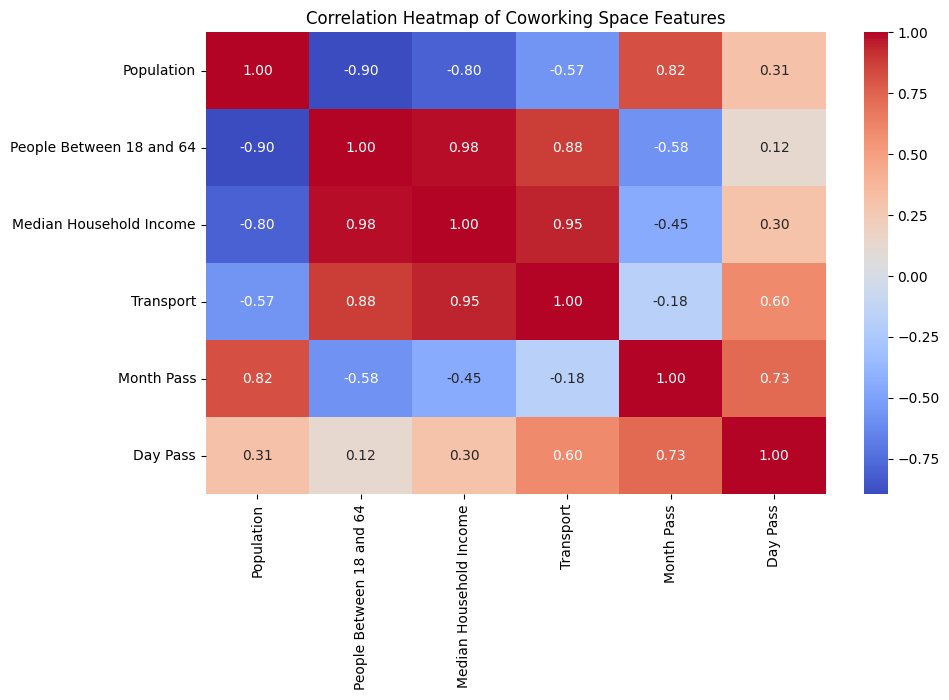

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = NewYork_location[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Coworking Space Features')
plt.show()


###

 - Densely Populated Areas:

Higher prices for monthly passes in densely populated areas suggest that coworking spaces in these locations can charge more for long-term commitments, possibly due to higher demand or limited availability.

 - Working-Age Population and Affluence:

Areas with a higher percentage of working-age individuals and higher median incomes tend to have better transport accessibility and can support higher prices for coworking spaces. However, these areas also show competitive pricing for monthly passes, possibly to attract long-term users.

 - Transport Accessibility:

Easy access to coworking spaces via public transportation allows for higher prices for day passes, as the convenience justifies the premium. However, monthly pass prices tend to be lower in areas with better transport accessibility, possibly due to competition.